(matplotlib)=

# Matplotlib: Visualization with Python

From matplotlib.org:
> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- Create publication quality plots.
- Make interactive figures that can zoom, pan, update.
- Customize visual style and layout.
- Export to many file formats .
- Embed in JupyterLab and Graphical User Interfaces.
- Use a rich array of third-party packages built on Matplotlib.

## Installing Matplotlib
To instally Matplotlib using pip, type the following command into the terminal:
> pip intall matplotlib

Then, put the following code at the start of any code that uses Matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## A Simple Example
The following examples were taken from https://matplotlib.org/stable/tutorials/introductory/usage.html:

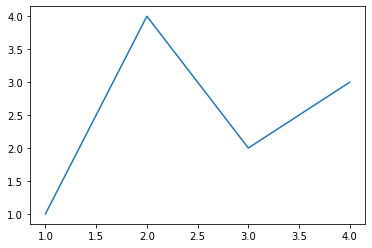

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

Matplotlib organizes plots into axes and figures. An axes is an object that represents all the plots that have been ploted on the same set of axes -- hence the name. Axes can then be grouped into figures to create multipart visualizations.

In the above example a figure and one set of axes are created using the plt.subplots command, and stored in the fig and ax variables, respectively. Then, the plot method is called on ax to create a line plot.

Here's a more comlex example, taken from the same tutorial:

Text(0, 0.5, 'entry b')

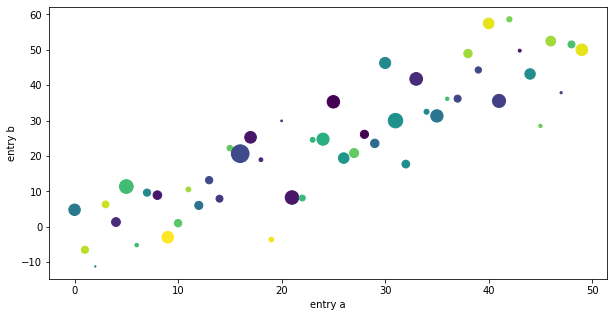

In [3]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

First, we create some random data in four variables, labeled "a", "b", "c" and "d". Then we create a figure and axes on which to plot the data. Note how we use the figsize option to make the plot larger, as on the default settings, Matplotlib makes this plot too small. Then, we call the scatter method on the axes to create a scatter plot. Variable a is used as the x-axis, b is the y-axis, c is used to specify the colors of the data points, and d is size. Note that we also have specify the data set that we are plotting using the data argument. Finally, we call the set_xlabel and set_ylabel to label out axes.

## Pyplot
The above examples utilized an object oriented style of programming: objects were created to represent figures and axes, and then methods were called on these objects to create the plot. However, with the PyPlot module, we can also use an imperative style. This allows us the get to the business of visualizing the data, without having to worry about keeping track of axes and figures, which PyPlot will manage for us in the background.

Here's an example:

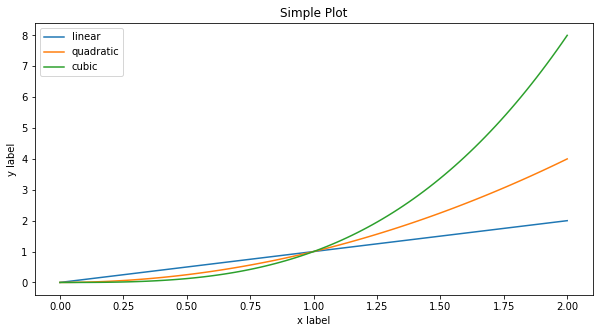

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(10, 5))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

Here, the plt.plot function was used called three times to graph a linear, quadratic and cubic function. Labeling and titling the visualization was again handled by functions, rather than methods.

## Arranging Multiple Axes in a Figure
Multiple axes can be plotted to the same figure. A nxm grid can be created by specifying the number of columns and rows when plt.subplots is called.

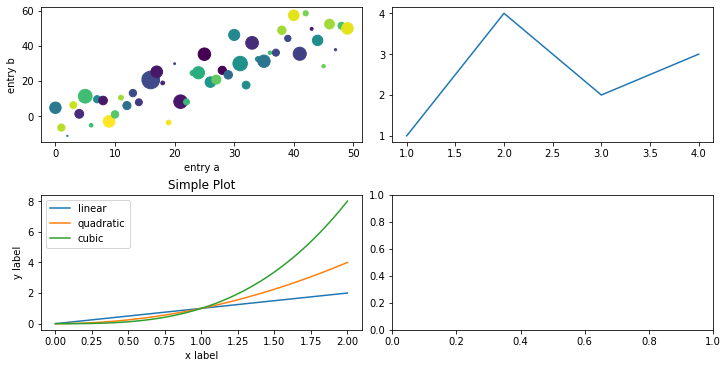

In [5]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 5),
                        constrained_layout=True)
axs[0,0].scatter('a', 'b', c='c', s='d', data=data)
axs[0,0].set_xlabel('entry a')
axs[0,0].set_ylabel('entry b');

axs[0,1].plot([1, 2, 3, 4], [1, 4, 2, 3])

axs[1,0].plot(x, x, label='linear')
axs[1,0].plot(x, x**2, label='quadratic')
axs[1,0].plot(x, x**3, label='cubic')
axs[1,0].set_xlabel('x label')
axs[1,0].set_ylabel('y label')
axs[1,0].set_title("Simple Plot")
axs[1,0].legend()

## NYC Data example
The following example creates some basic visualizations using the NYC Crash data set. First, we load the data using the read_csv function from pandas. Then, we create a visualization using the countplot function from Seaborn. Seaborn is a package built on top of Matplotlib that contains a lot of functions useful functions for creating statistical data visualizations.

One question that comes to mind is: "how often do crashes in the data set involve fatalities, and if so, how many fatalities?" Countplot to the rescue!

<AxesSubplot:xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

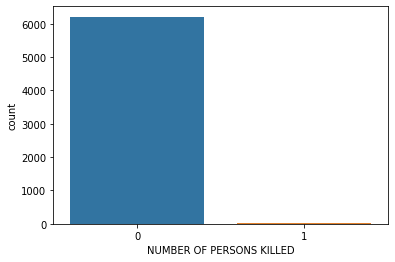

In [6]:
import pandas as pd
import seaborn as sns

nyc_crash = pd.read_csv("../data/nyc_mv_collisons_202201.csv")
sns.countplot(x ='NUMBER OF PERSONS KILLED', data = nyc_crash)

As we see, almost all of the incidents in the data set were non-fatal. That's objectively a good thing, but it makes for a rather boring visualization. Now, let's do the same, but this time, let's look at the number of persons injured -- not just the number of fatalities.

<AxesSubplot:xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

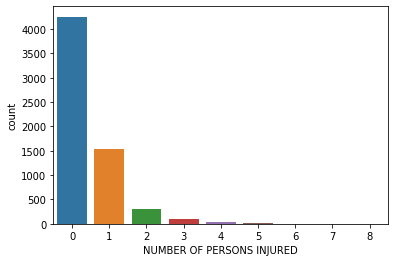

In [7]:
sns.countplot(x ='NUMBER OF PERSONS INJURED', data = nyc_crash)

As we can see, most of the crashes didn't involve any injuries. Surely this is a great victory for automotive safety. Of those that had injuries, the most common number was one, and the frequency drops off very quickly from there.

We can display both of these visualizations on the same plotting grid by making a 1x2 figure with the subplots function from Matplotlib, and then supplying the desired axes to countplot using the ax argument.

<AxesSubplot:xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

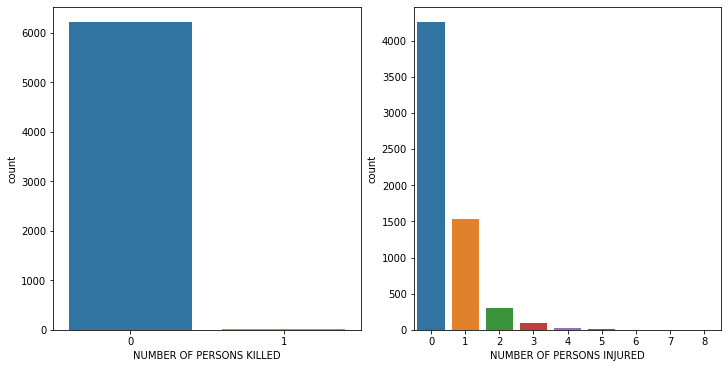

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5),
                        constrained_layout=True)
sns.countplot(x ='NUMBER OF PERSONS KILLED', data = nyc_crash, ax=axs[0])
sns.countplot(x ='NUMBER OF PERSONS INJURED', data = nyc_crash, ax=axs[1])